In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.shape

(1338, 7)

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(1337, 7)

Text(0.5, 1.0, 'Age Distribution')

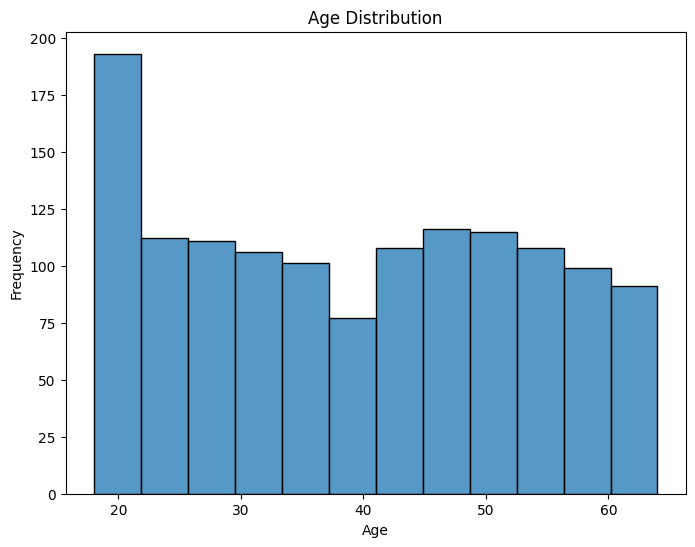

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Gender Distribution')

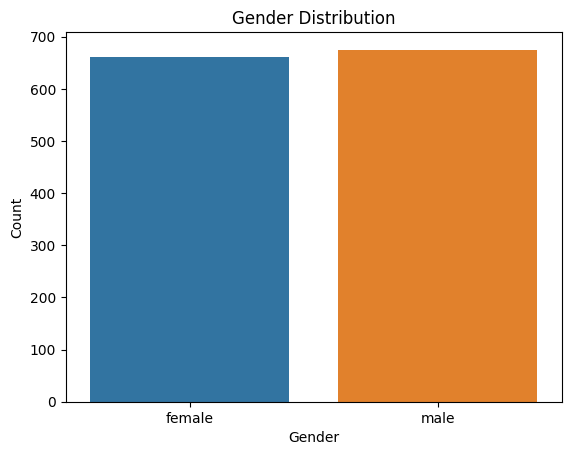

In [11]:
sns.countplot(data = data, x = data['sex'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'BMI Distribution')

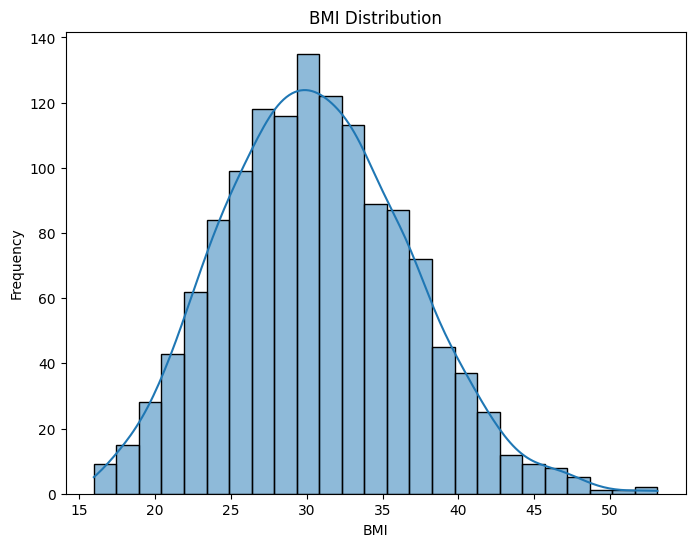

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(data['bmi'],kde=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Number of Children Distribution')

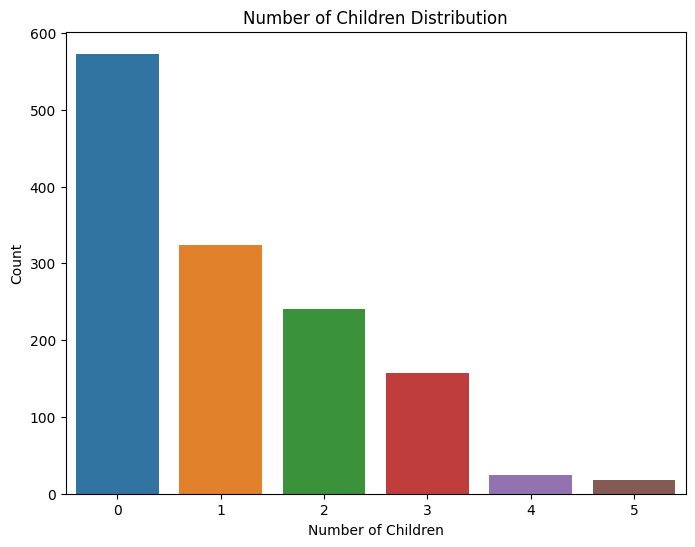

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')

Text(0.5, 1.0, 'Smoker vs. Non-Smoker Distribution')

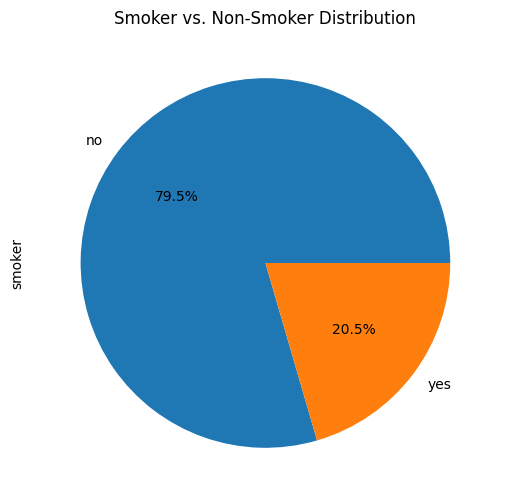

In [14]:
plt.figure(figsize=(8, 6))
data['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')

Text(0.5, 1.0, 'Region Distribution')

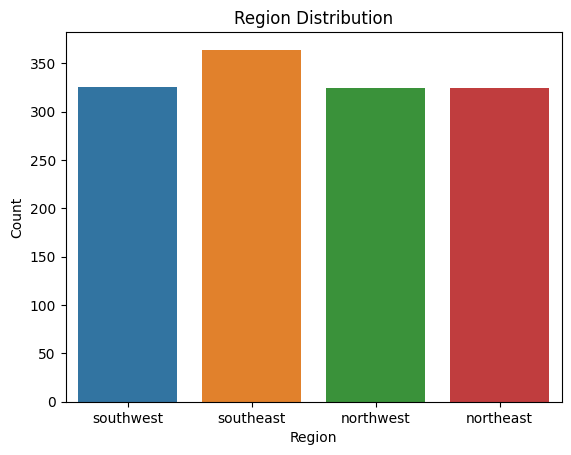

In [15]:
sns.countplot(data=data, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')

Text(0.5, 1.0, 'Medical Charges')

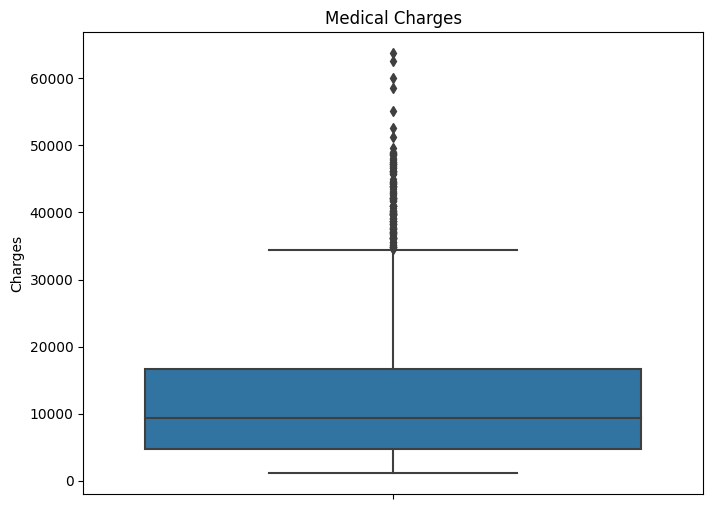

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='charges')
plt.ylabel('Charges')
plt.title('Medical Charges')

Text(0.5, 1.0, 'Age vs. Charges')

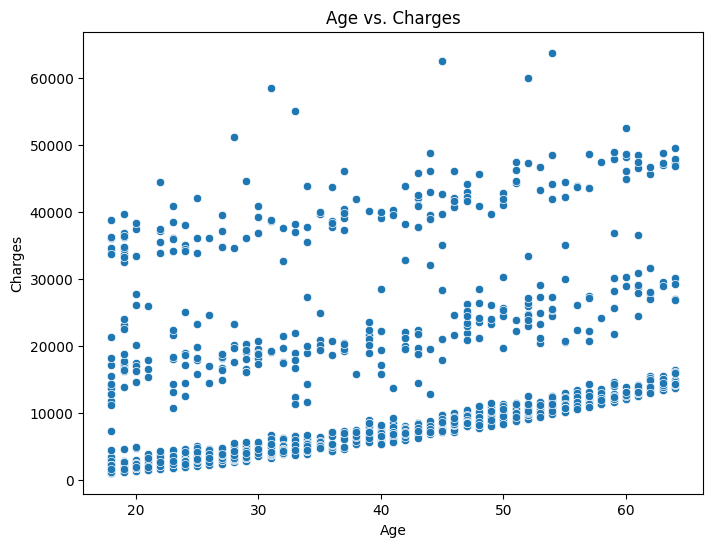

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = data, x = data['age'], y = data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')

Text(0.5, 1.0, 'BMI vs. Charges')

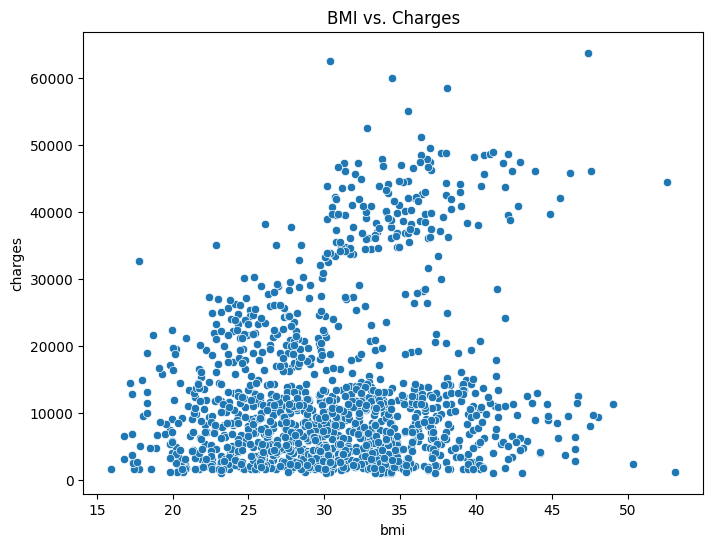

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = data, x = data['bmi'], y = data['charges'])
plt.title('BMI vs. Charges')

Text(0.5, 1.0, 'Sex vs. Charges')

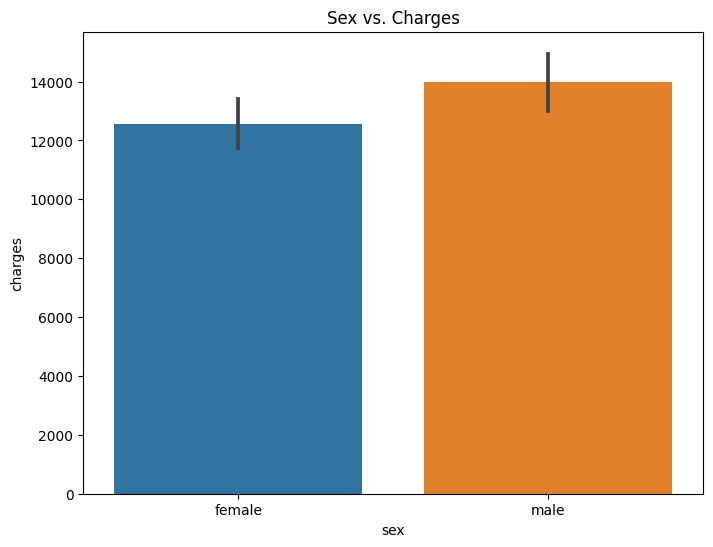

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(data = data, x = data['sex'], y = data['charges'])
plt.title('Sex vs. Charges')

Text(0.5, 1.0, 'Smokers vs. Charges')

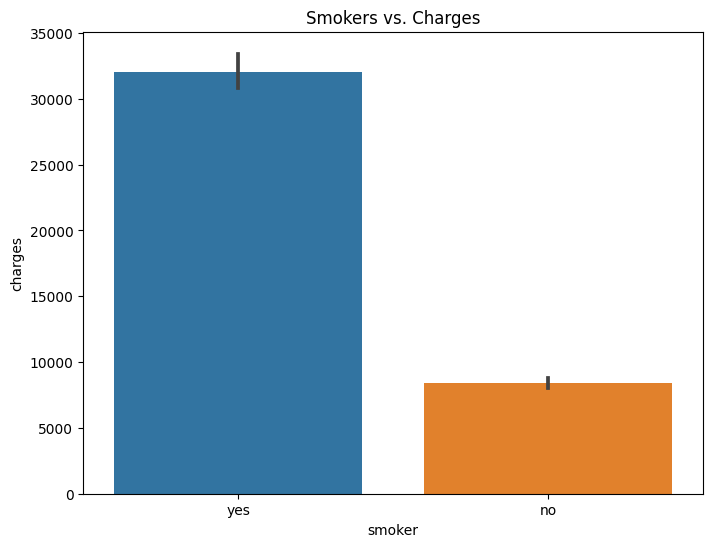

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(data = data, x = data['smoker'], y = data['charges'])
plt.title('Smokers vs. Charges')

Text(0.5, 1.0, 'Region vs. Charges')

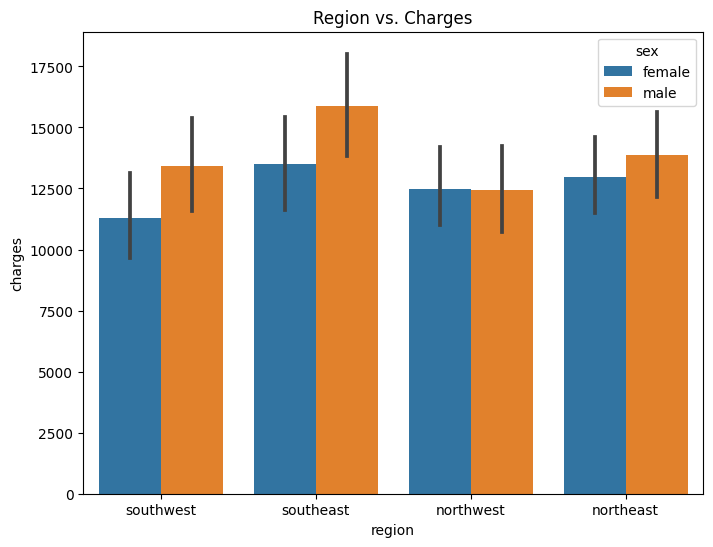

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(data = data, x = data['region'], y = data['charges'], hue = data['sex'])
plt.title('Region vs. Charges')

In [22]:
avg_charges = data.groupby('age')['charges'].mean()

Text(0.5, 1.0, 'Average Charges by Age')

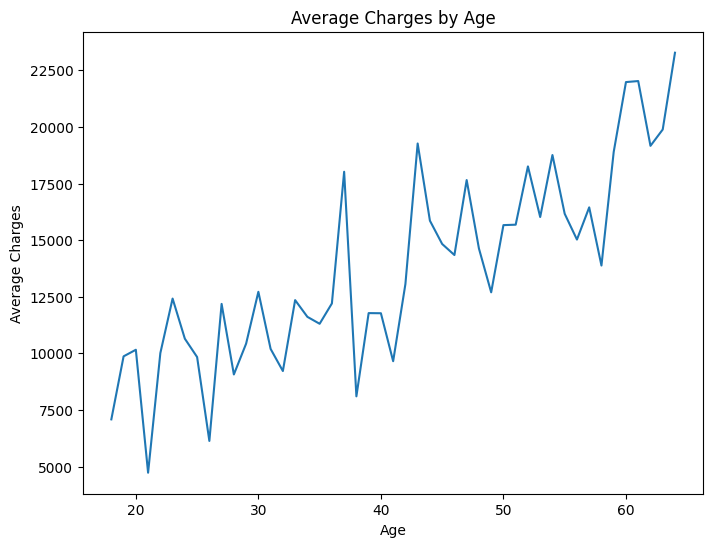

In [23]:
plt.figure(figsize=(8,6))
plt.plot(avg_charges)
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.title('Average Charges by Age')

In [24]:
avg_BMI = data.groupby('bmi')['charges'].mean()

Text(0.5, 1.0, 'Average Charges by BMI')

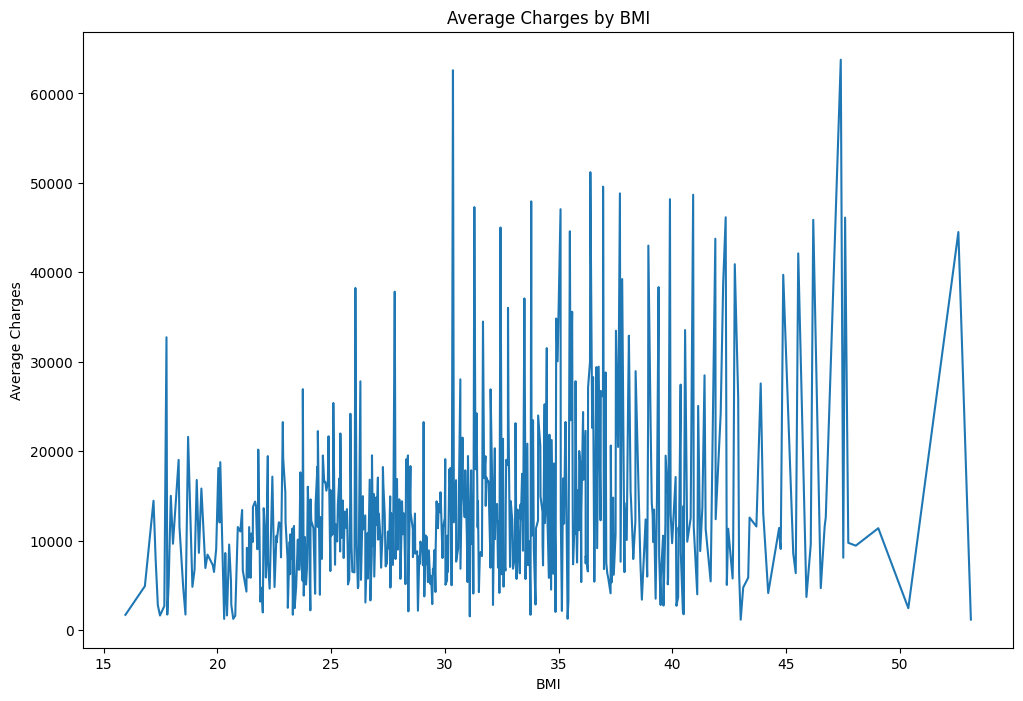

In [25]:
plt.figure(figsize=(12,8))
plt.plot(avg_BMI)
plt.xlabel('BMI')
plt.ylabel('Average Charges')
plt.title('Average Charges by BMI')

Text(0.5, 1.0, 'Charges Distribution by Gender')

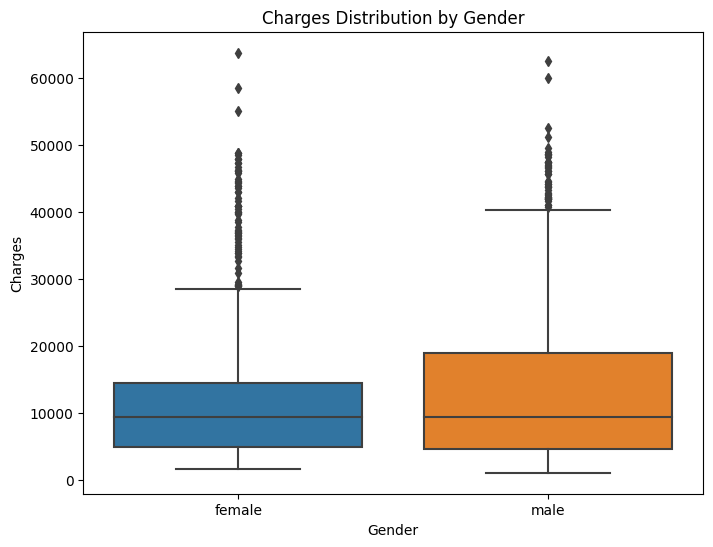

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(data = data, x=data['sex'], y=data['charges'])
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')

Text(0.5, 1.0, 'Charges Distribution by Smoker')

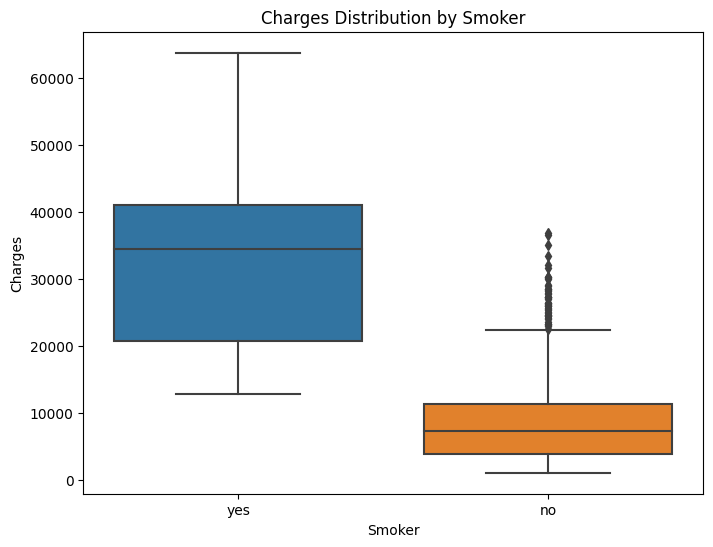

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x=data['smoker'], y=data['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')

Text(0.5, 1.0, 'Charges Distribution by Smoker')

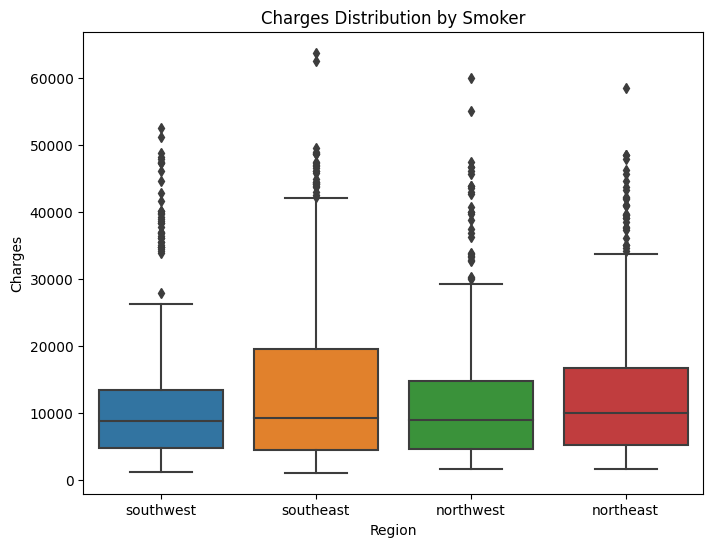

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x=data['region'], y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
region_smoker=data.groupby(['region','smoker']).size().unstack()

Text(0.5, 1.0, 'Percentage of Smokers and Non-Smokers by Region')

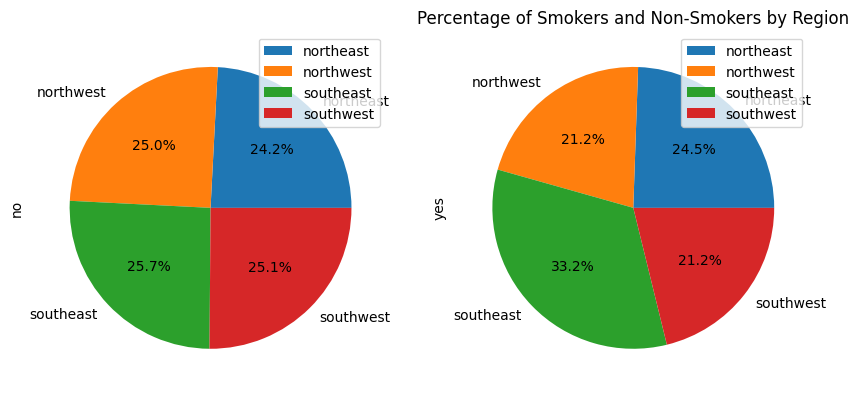

In [31]:
region_smoker.plot(kind='pie', figsize=(10,8),autopct='%1.1f%%', subplots=True)
plt.legend(loc='upper right')
plt.title('Percentage of Smokers and Non-Smokers by Region')

Text(0.5, 1.0, 'Grouped Box Plot')

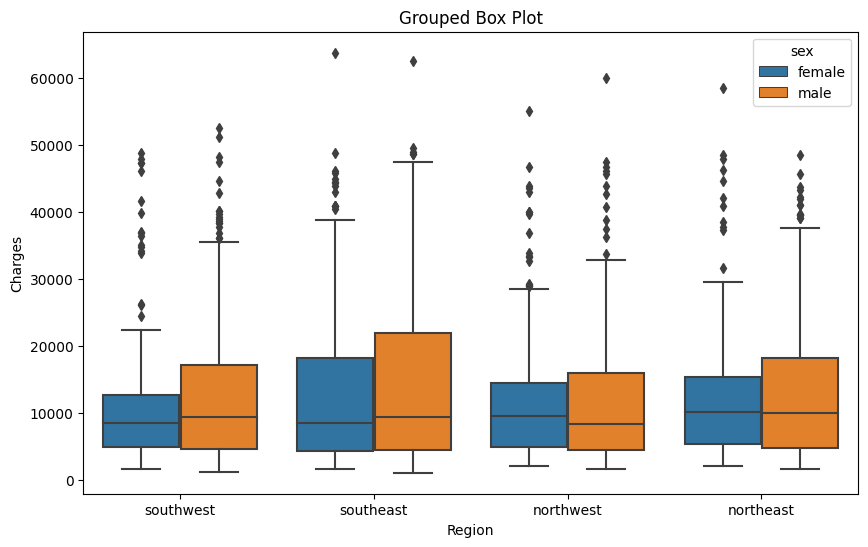

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')

Text(0.5, 1.0, 'Grouped Box Plot')

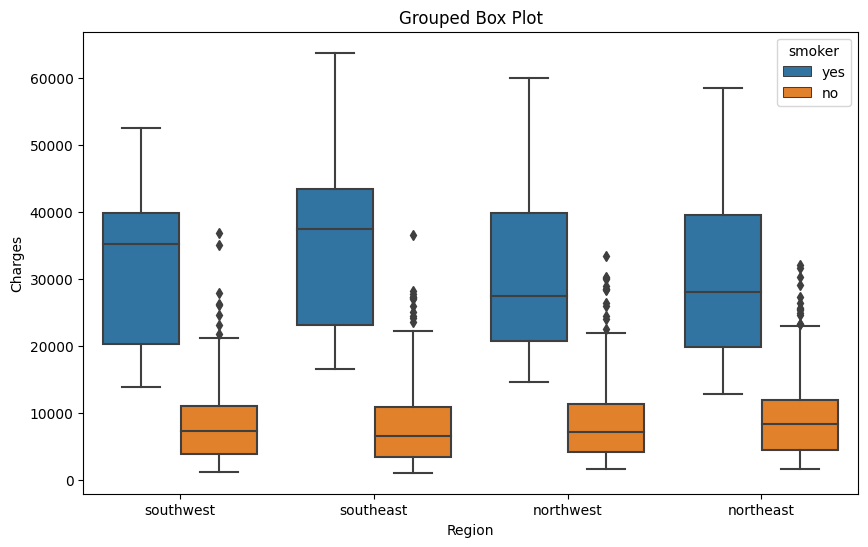

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='region', y='charges', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Grouped Box Plot')

In [34]:
features = ['age', 'bmi', 'charges']
X = data[features]
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(X)
data['cluster'].head()

0    0
1    1
2    1
3    0
4    1
Name: cluster, dtype: int32

Text(0.5, 1.0, 'Cluster Analysis')

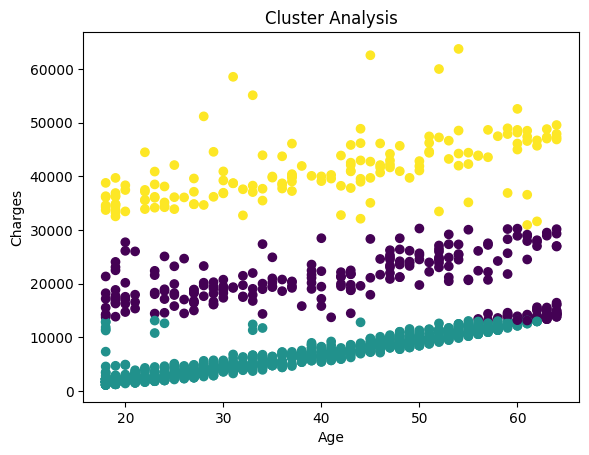

In [35]:
plt.scatter(data['age'], data['charges'], c=data['cluster'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Cluster Analysis')

In [36]:
data['sex'] = pd.factorize(data['sex'])[0] + 1
data['region'] = pd.factorize(data['region'])[0] + 1
data['smoker'] = pd.factorize(data['smoker'])[0] + 1

In [37]:
corr = data.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
cluster     0.293824
bmi         0.198401
children    0.067389
sex         0.058044
region      0.006547
smoker     -0.787234
Name: charges, dtype: float64

<AxesSubplot: >

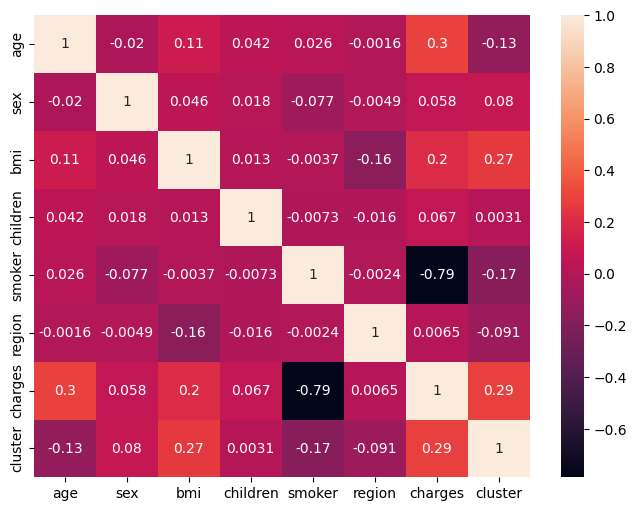

In [38]:
plt.figure(figsize=(8,6))
data_ploting = data.corr(method='pearson')
sns.heatmap(data_ploting,annot=True)

<Figure size 1000x800 with 0 Axes>

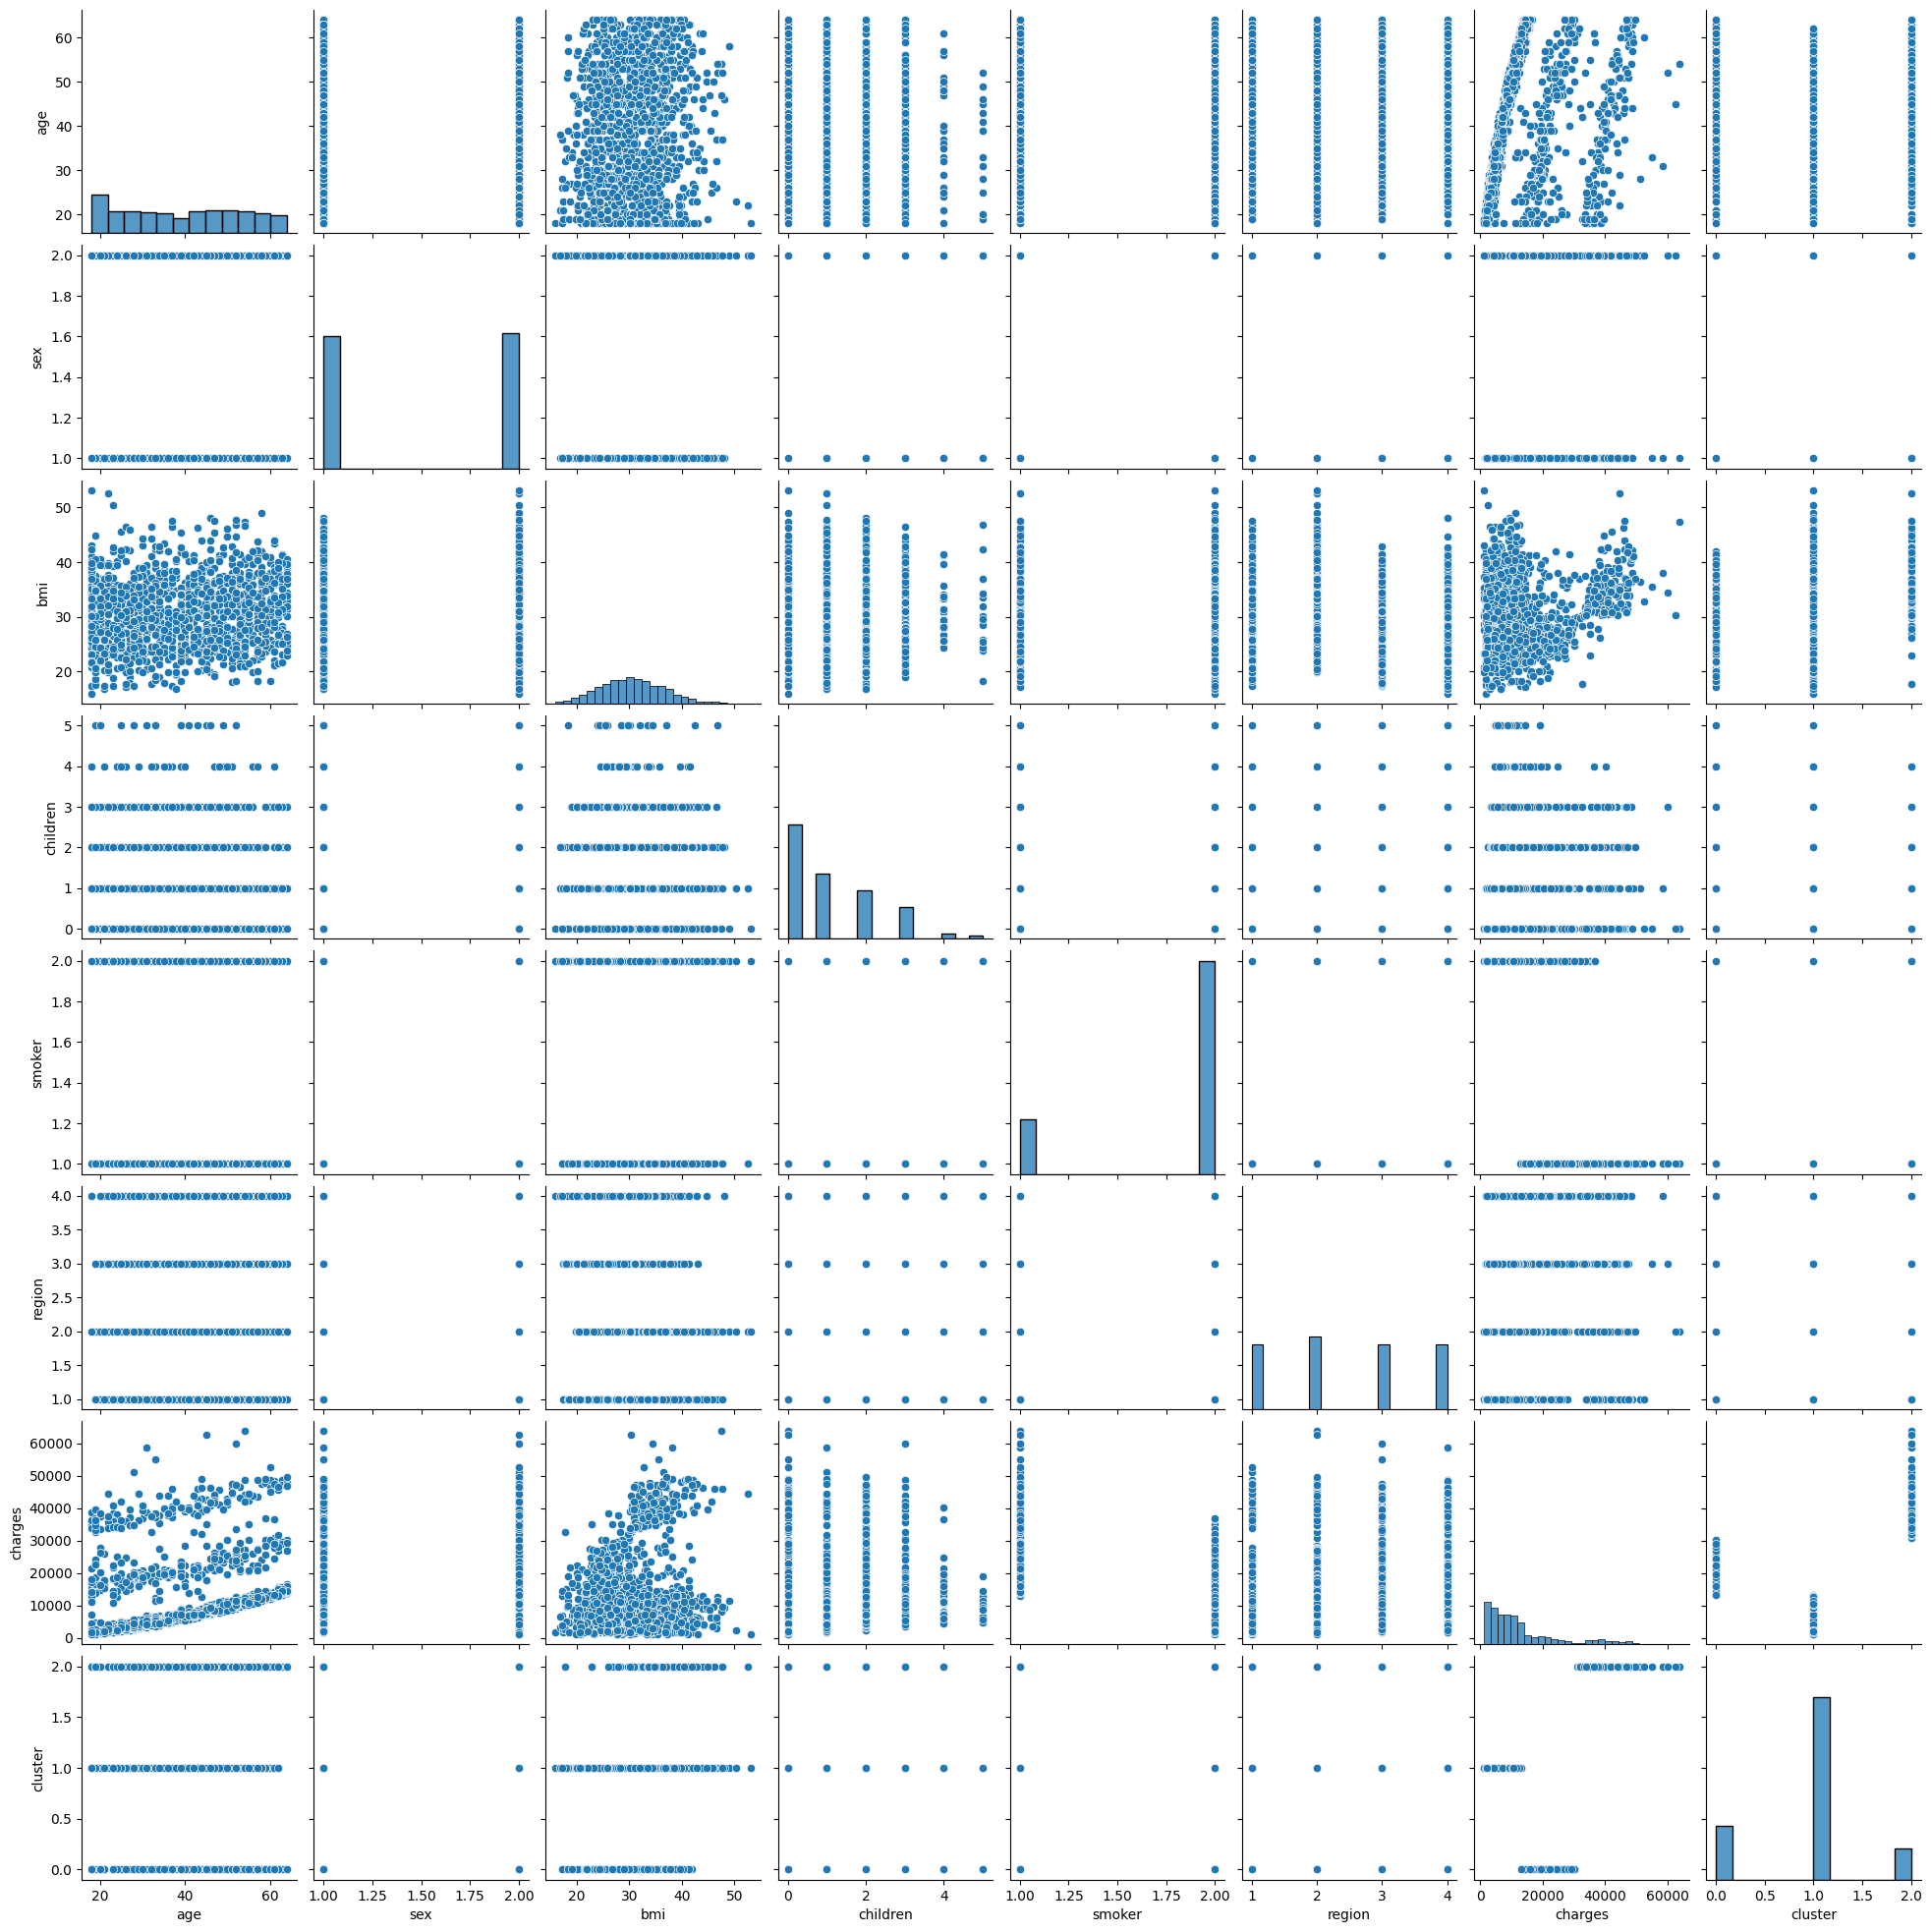

In [39]:
plt.figure(figsize=(10,8))
sns.pairplot(data)

# Machine Learning Model

In [60]:
droping = ['charges','cluster']
X = data.drop(droping, axis =1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [42]:
def scores(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

## Linear Regressor Model

In [43]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaler, y_train)

LinearRegression()

In [44]:
y_pred = linear_reg_model.predict(X_test_scaler)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,4.149300e+03
MSE_li_reg,3.584746e+07
RMSE_li_reg,5.987275e+03


In [45]:
scores = cross_val_score(linear_reg_model, X_train_scaler, y_train)
print(np.sqrt(scores))

[0.84840623 0.87239773 0.87448447 0.85849818 0.88197992]


In [46]:
r2_score(y_test, linear_reg_model.predict(X_test_scaler))

0.7205666915093298

## Decision Tree  Regressor

In [47]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaler, y_train)

DecisionTreeRegressor()

In [48]:
y_pred = tree_reg_model.predict(X_test_scaler)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,3.105934e+03
MSE_tree_reg,4.381888e+07
RMSE_tree_reg,6.619583e+03


In [49]:
scores = cross_val_score(tree_reg_model, X_train_scaler, y_train, cv=5)
print(np.sqrt(scores))

[0.80136782 0.84068537 0.86217003 0.86295011 0.87585057]


In [50]:
r2_score(y_test, tree_reg_model.predict(X_test_scaler))

0.6584289147110117

## Random Tree Regressor

In [59]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaler, y_train)

RandomForestRegressor()

In [52]:
y_pred = forest_reg_model.predict(X_test_scaler)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.707494e+03
MSE_forest_reg,2.282256e+07
RMSE_forest_reg,4.777297e+03


In [53]:
scores = cross_val_score(forest_reg_model, X_train_scaler, y_train, cv=5)
print(np.sqrt(scores))

[0.90377461 0.91520855 0.91291482 0.91649766 0.92984599]


In [54]:
r2_score(y_test, forest_reg_model.predict(X_test_scaler))

0.8220965932513475

## Gradient Boosting Regressor

In [55]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaler, y_train)

GradientBoostingRegressor()

In [56]:
y_pred = Gradient_model.predict(X_test_scaler)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.480817e+03
MSE_gradient,1.984267e+07
RMSE_gradient,4.454511e+03


In [57]:
scores = cross_val_score(Gradient_model, X_train_scaler, y_train, cv=5)
print(np.sqrt(scores))

[0.91067359 0.92754306 0.91376151 0.92042903 0.94090728]


In [58]:
r2_score(y_test, Gradient_model.predict(X_test_scaler))

0.8453250817292165

## Result Of ML Model




#### This project protraits the potential of machine learning techniques in predicting healthcare costs and correlation between different features.  The Gradient Boosting Regressor performed best among all with score of 0.841
